# Import

In [12]:
import matplotlib
import pylab as plt
import numpy as np
import pandas as pd 
from numpy import random

In [22]:
# Read classificaiton training data
train_clf_vis =  pd.read_csv("../Data/Classification_train_vis.csv")

# Data Visualization

## Location Map

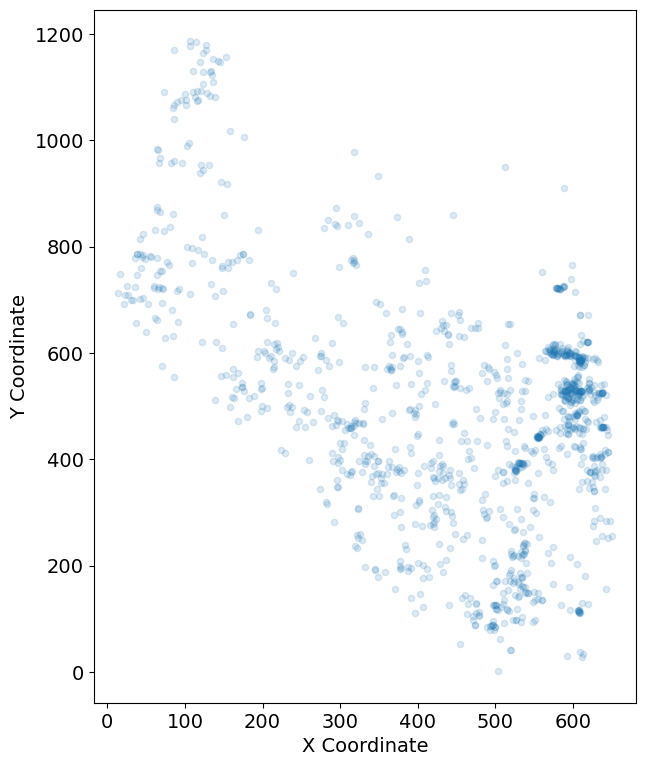

In [23]:
# Change alpha for a better visualization and highlighting high-density areas
train_clf_vis.plot(kind="scatter", x="X Coordinate (km)", y="Y Coordinate (km)",fontsize=14,figsize=(7,9),alpha=0.15)   
plt.xlabel('X Coordinate',fontsize=14) 
plt.ylabel('Y Coordinate',fontsize=14)
plt.show()

## Correlation Bar Plot

In [15]:
def corr_bar(df):
    """Plot correlation bar with the pair of atrribute with last column"""
    corr=df.corr()
    Colms_sh=list(list(corr.columns)) #list of column names
    coefs=corr.values[:,-1][:-1] #list of corr values for vs each column except itself
    names=Colms_sh[:-1] #list of column names w/o 'Classification'
    r_ = pd.DataFrame( { 'coef': coefs, 'positive': coefs>=0  }, index = names ) #Dataframe with 1st column = corr values and 2nd column = Boolean values based on +ve corr values
    r_ = r_.sort_values(by=['coef']) #Sort values descending
    r_['coef'].plot(kind='barh', color=r_['positive'].map({True: 'b', False: 'r'})) #plot corr values on a horizontal bar plot
    plt.xlabel('Correlation Coefficient',fontsize=6)
    plt.vlines(x=0,ymin=-0.5, ymax=10, color = 'k',linewidth=0.8,linestyle="dashed") #Add dashed line to provide distinction b/w +ve and -ve corr values
    plt.show()

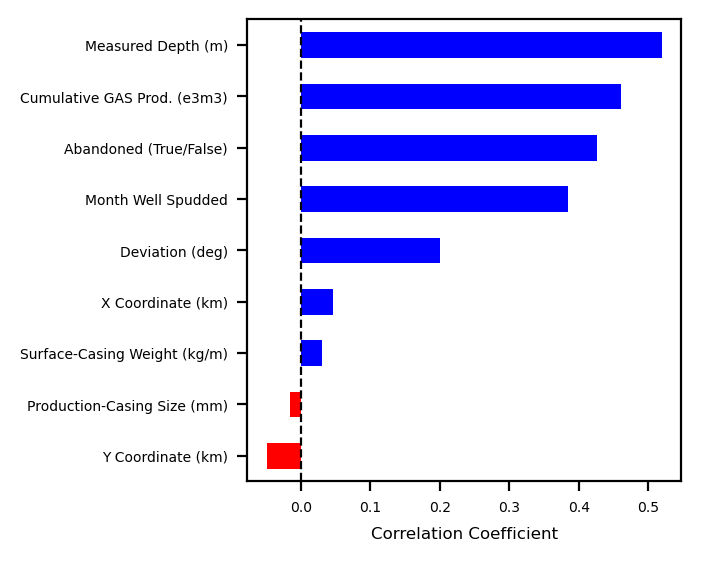

In [16]:
font = {'size'   : 5} #font size
matplotlib.rc('font', **font) #Set the font to be a preset grouping of parameters
ax1 = plt.subplots(figsize=(2.8, 3), dpi= 200, facecolor='w', edgecolor='k')
corr_bar(train_clf_vis)

This plot displays the correlation between each column and the Classification Column. 

## Cross Plot

In [17]:
def CrossPlot (x,y,xlabl,ylabl,axt=None):
    '''Cross plot between two variables'''
    from matplotlib.offsetbox import AnchoredText
    ax1 = axt or plt.axes()
    x=np.array(x)
    y=np.array(y)    
    n_x=len(x)
    Mean_x=np.mean(x)
    SD_x=np.sqrt(np.var(x)) 
    n_y=len(y)
    Mean_y=np.mean(y)
    SD_y=np.sqrt(np.var(y)) 
    corr=np.corrcoef(x,y)
    plt.plot(x,y,'ro',markersize=2,alpha=0.15)
    txt='$\\rho_{XY}$=%.3f \n $n$=%.0f \n $\mu_{X}$=%.1f \n $\sigma_{X}$=%.1f \n '
    txt+=' $\mu_{Y}$=%.1f \n $\sigma_{Y}$=%.1f'
    anchored_text = AnchoredText(txt %(corr[1,0], n_x,Mean_x,SD_x,Mean_y,SD_y), loc=1)
    ax1.add_artist(anchored_text)
    plt.xlabel(xlabl,fontsize=font['size'])            
    plt.ylabel(ylabl,fontsize=font['size'])     

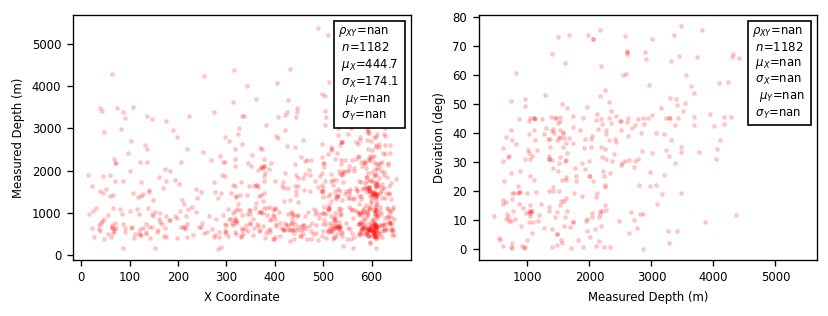

In [18]:
font = {'size'   :7 }
matplotlib.rc('font', **font)
fig=plt.figure(figsize=(8, 2.65), dpi= 120, facecolor='w', edgecolor='k')

ax1 = plt.subplot(1,2,1)
CrossPlot (x=train_clf_vis['X Coordinate (km)'],y=train_clf_vis['Measured Depth (m)'],xlabl='X Coordinate',
           ylabl='Measured Depth (m)',axt=ax1)

ax2 = plt.subplot(1,2,2)
CrossPlot (x=train_clf_vis['Measured Depth (m)'],y=train_clf_vis['Deviation (deg)'],xlabl='Measured Depth (m)',
           ylabl='Deviation (deg)',axt=ax2)

## Histogram

In [19]:
def histplt (val,bins,title,xlabl,xlimt,axt=None):
    """ Function for histogram plotting"""
    from matplotlib.offsetbox import AnchoredText
    
    ax1 = axt or plt.axes()
    val=np.array(val)
    plt.hist(val, bins=bins,ec='black')      
    n=len(val)
    Mean=np.mean(val)
    SD=np.sqrt(np.var(val))
    Max=np.amax(val)
    Min=np.amin(val)
    txt='n=%.0f \n $\mu$=%.1f \n $\sigma$=%.1f \n Max=%.1f \n Min=%.1f'
    anchored_text = AnchoredText(txt %(n,Mean,SD,Max,Min), loc=1)
    ax1.add_artist(anchored_text)
    plt.title(title,fontsize=font['size']*1.25)   
    plt.xlabel(xlabl,fontsize=font['size'])            
    plt.ylabel('Frequency',fontsize=font['size'])
    plt.xlim(xlimt)
    ax1.grid(linewidth='0.35')

C:\Users\sid21\AppData\Local\Temp\ipykernel_26408\994608196.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1=plt.subplot(1,2,1)


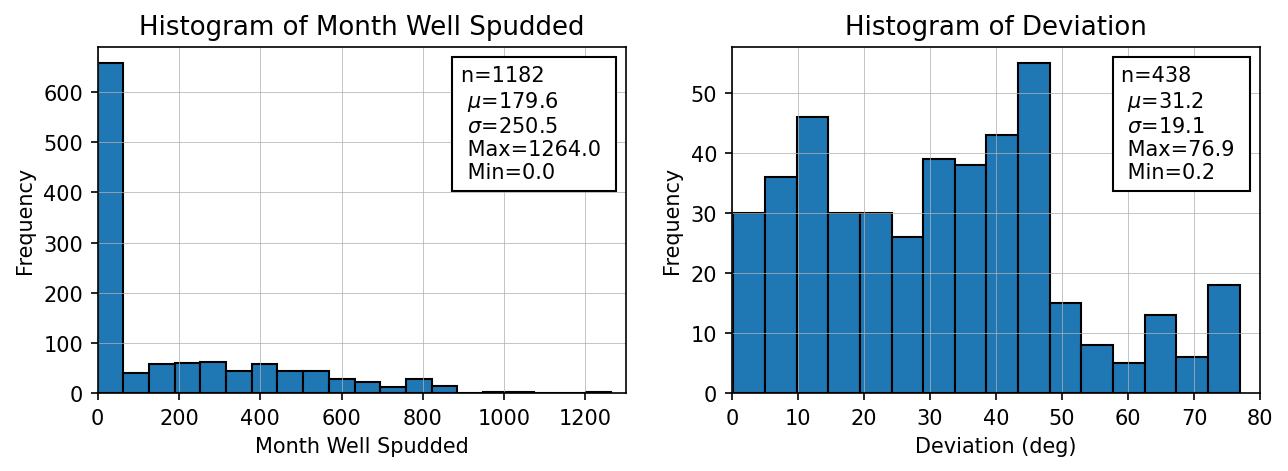

In [20]:
font = {'size'   : 10}
matplotlib.rc('font', **font)
fig = plt.subplots(figsize=(10, 3), dpi= 150, facecolor='w', edgecolor='k')

ax1=plt.subplot(1,2,1) 
val=train_clf_vis['Month Well Spudded']
histplt(val,bins=20,title='Histogram of Month Well Spudded',xlabl='Month Well Spudded',xlimt=(0,1300),axt=ax1)

ax2=plt.subplot(1,2,2) 
val=train_clf_vis['Deviation (deg)'].dropna()
histplt(val,bins=16,title='Histogram of Deviation',xlabl='Deviation (deg)',xlimt=(0,80),axt=ax2)